# Assignment 4. Deep Learning

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

*For questions 2-4 refer to @alregamo on Telegram.*

### Description  
This homework consists of four questions, each aimed at one category in the world of Deep Learning.   
1. Getting familiarized with sentiment analysis (A subject also covered in the course project).
   
2. Multi-layer perceptron (MLP).
   
3. Convolutional Neural Networks (CNN).
   
4. Variational Autoencoders (VAE).

### Information  
Complete the information box below.

In [ ]:
full_name = 'Hadi Hadavi'
student_id = '99100263'

### Note
The questions are not necessarily in order of difficulty. You are obligated to answer **3 out of 4** questions. The fourth question is optional and is considered as bonus.

## 3 Convolutational Neural Networks (CNN)

In this problem, you are going to compare the results of a simple CNN with a pre-trained deep learning model such as VGG16 for a classification task.

For this purpose, we are going to use a publicly available dataset, named CIFAR10. The CIFAR-10 dataset is a popular benchmark in the field of machine learning for image recognition tasks. Here are the key points about this dataset:

1. **Content**: The CIFAR-10 dataset consists of 60,000 32x32 color images. These images are divided into 10 different classes, representing different objects. The classes are airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

2. **Structure**: The dataset is split into two parts: 50,000 images for training and 10,000 images for testing. Each class in the dataset is represented equally, with 6,000 images per class.

3. **Purpose**: CIFAR-10 is widely used for training and evaluating machine learning and image processing systems. It's a benchmark dataset for developing and testing machine learning algorithms, especially in the field of computer vision.

4. **Challenge**: The relatively low resolution of the images (32x32 pixels) makes it a challenging dataset for image classification tasks. The small size of the images means that the details that distinguish between the classes can be quite subtle.

### 3.1 Data Loading

Load the dataset with <code>torchvision.datasets</code> or <code>tensorflow.keras.datasets</code> and split the data into training and test sets.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Print the sizes of the datasets
print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Files already downloaded and verified
Files already downloaded and verified
Training set size: 50000
Test set size: 10000


### 3.2 CNN Model

Build a simple 3-layer CNN model, which takes CIFAR10 images as input and classify their labels. Feel free to use <code>BatchNorm</code> or <code>Pooling</code> layers between your <code>Conv</code> layers. Use 2 layers of fully connected <code>Linear</code> or <code>Dense</code> layers for classificaton.

After building your model, make a summary of your architecture using <code>model.summary()</code> in Keras or <code> torchsummary</code> library for pytorch models.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 128 * 4 * 4)  # Flatten the output for the fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the model
model = SimpleCNN()

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Display the model summary
summary(model, (3, 32, 32), device=str(device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
         MaxPool2d-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 64, 16, 16]          18,496
       BatchNorm2d-5           [-1, 64, 16, 16]             128
         MaxPool2d-6             [-1, 64, 8, 8]               0
            Conv2d-7            [-1, 128, 8, 8]          73,856
       BatchNorm2d-8            [-1, 128, 8, 8]             256
         MaxPool2d-9            [-1, 128, 4, 4]               0
           Linear-10                  [-1, 512]       1,049,088
           Linear-11                   [-1, 10]           5,130
Total params: 1,147,914
Trainable params: 1,147,914
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forw

### 3.3 Train your Model

Train your model for 20 epochs by using Adam optimizer for the training. Plot the accuracy curves for your training and test data during the training phase. Also plot the loss curves as well.

You can use interactive tools such as <code>tensorboard</code> for these visualizations.

Epoch 1/20 - Training Accuracy: 0.93758, Training Loss: 0.1948
Validation Accuracy: 0.807
Epoch 2/20 - Training Accuracy: 0.94998, Training Loss: 0.1591
Validation Accuracy: 0.811
Epoch 3/20 - Training Accuracy: 0.95874, Training Loss: 0.1364
Validation Accuracy: 0.8105
Epoch 4/20 - Training Accuracy: 0.96494, Training Loss: 0.1203
Validation Accuracy: 0.813
Epoch 5/20 - Training Accuracy: 0.97126, Training Loss: 0.1045
Validation Accuracy: 0.8098
Epoch 6/20 - Training Accuracy: 0.97568, Training Loss: 0.0921
Validation Accuracy: 0.8111
Epoch 7/20 - Training Accuracy: 0.98142, Training Loss: 0.0789
Validation Accuracy: 0.8087
Epoch 8/20 - Training Accuracy: 0.98432, Training Loss: 0.0688
Validation Accuracy: 0.8061
Epoch 9/20 - Training Accuracy: 0.98802, Training Loss: 0.0585
Validation Accuracy: 0.8076
Epoch 10/20 - Training Accuracy: 0.99138, Training Loss: 0.0496
Validation Accuracy: 0.8055
Epoch 11/20 - Training Accuracy: 0.99376, Training Loss: 0.0417
Validation Accuracy: 0.8092


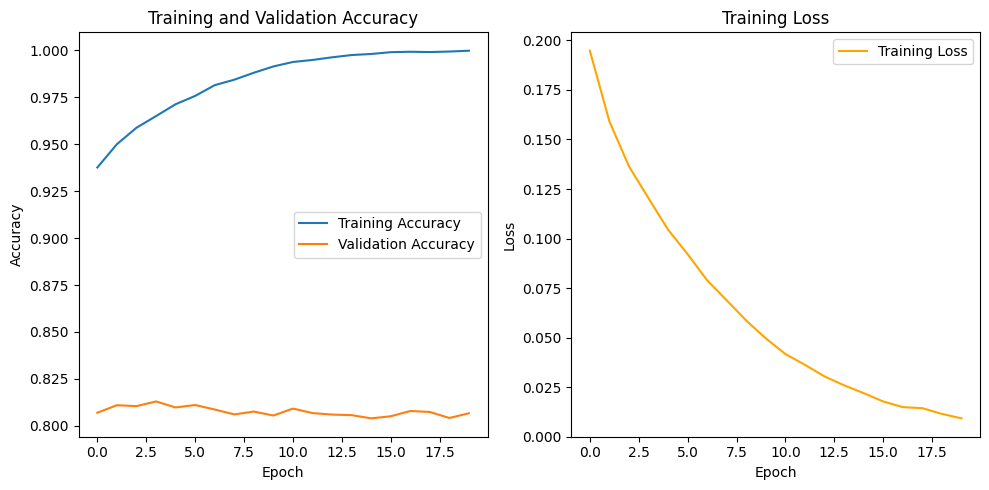

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
epochs = 20
train_accuracy_list = []
train_loss_list = []
test_accuracy_list = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train
    average_loss = running_loss / len(train_loader)

    # Log training accuracy and loss
    print(f"Epoch {epoch + 1}/{epochs} - Training Accuracy: {train_accuracy}, Training Loss: {average_loss:.4f}")

    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(average_loss)

    # Validation loop
    model.eval()
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test

    # Log validation accuracy
    print(f"Validation Accuracy: {test_accuracy}")
    test_accuracy_list.append(test_accuracy)

# Plot the results at the end
plt.figure(figsize=(10, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy_list, label='Training Accuracy')
plt.plot(test_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(train_loss_list, label='Training Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.tight_layout()
plt.show()

### 3.4 Evaluate your Model

Now that you have trained your model, do the followings:

* plot your model's confusion matrix on the test set.
* report its final accuracy on your test set.
* show some images from the test set with their corresponding true label and your predictions.

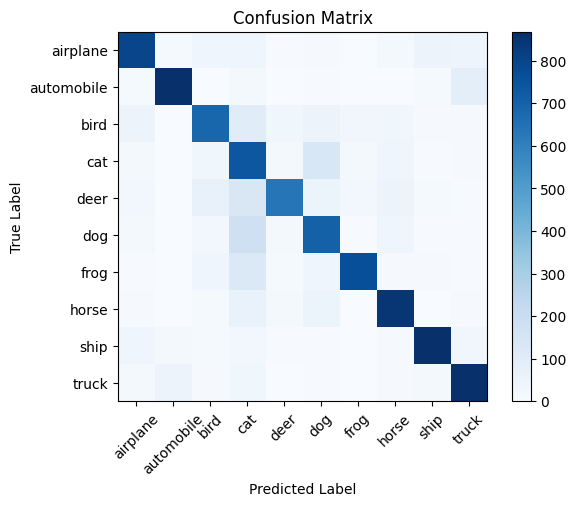

Final Accuracy on Test Set: 77.71%


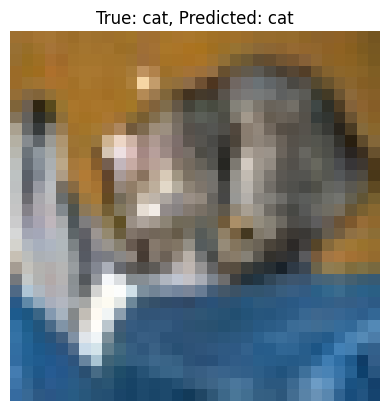

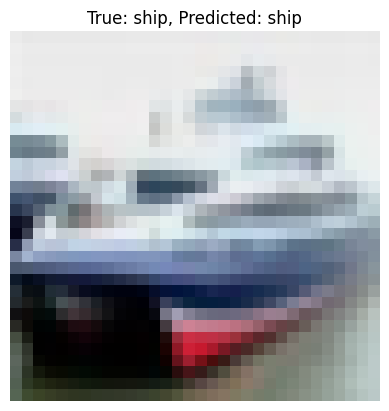

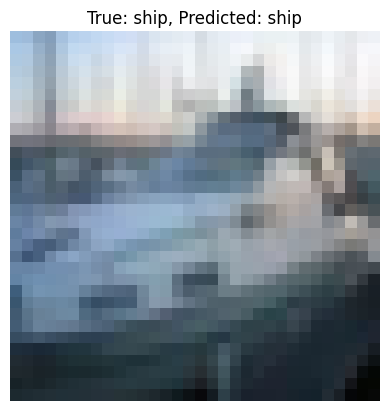

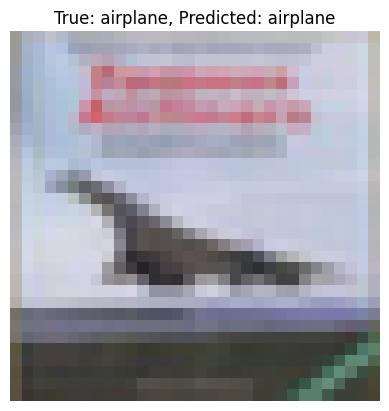

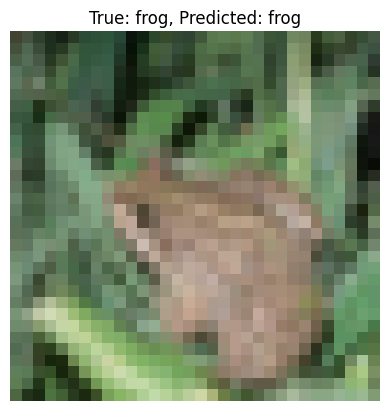

In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate and plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, classes):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Function to display images with true and predicted labels
def display_images_with_labels(images, true_labels, predicted_labels, classes, num_images=5):
    for i in range(num_images):
        image, true_label, predicted_label = images[i], classes[true_labels[i]], classes[predicted_labels[i]]
        plt.imshow(image)
        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        plt.axis("off")
        plt.show()

# Evaluate the model on the test set
model.eval()
true_labels_list = []
predicted_labels_list = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels_list.extend(labels.cpu().numpy())
        predicted_labels_list.extend(predicted.cpu().numpy())

# Convert the lists to NumPy arrays
true_labels_array = np.array(true_labels_list)
predicted_labels_array = np.array(predicted_labels_list)

# Get the list of class names from the CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix
plot_confusion_matrix(true_labels_array, predicted_labels_array, class_names)

# Report final accuracy on the test set
final_accuracy = accuracy_score(true_labels_array, predicted_labels_array)
print(f"Final Accuracy on Test Set: {final_accuracy * 100:.2f}%")

# Display some images with their true and predicted labels
display_images_with_labels(test_dataset.data, true_labels_array, predicted_labels_array, class_names)

### VGG16 Model and Transfer Learning

VGG16 is a popular convolutional neural network (CNN) architecture that was introduced by Karen Simonyan and Andrew Zisserman from the University of Oxford in a 2014 paper titled "Very Deep Convolutional Networks for Large-Scale Image Recognition." Here are the key points about the VGG16 model:

1. **Architecture**: VGG16 is named for its 16 layers that have weights. The architecture is characterized by its simplicity, using only 3x3 convolutional layers stacked on top of each other in increasing depth. Reducing volume size is handled by max pooling. The final architecture includes several fully connected layers.

2. **Uniform Design**: One of the defining aspects of VGG16 is its uniformity. All hidden layers use the same 3x3 convolutional filters with a stride of 1 and the same max pooling filters of 2x2 with a stride of 2. This consistency makes the architecture easy to scale and adapt.

3. **Depth**: The depth of the network (16 layers) was a significant feature at the time of its introduction. The increased depth helps the network to learn more complex patterns in the data.

4. **Performance**: In the ImageNet competition, which is a benchmark in image classification, VGG16 significantly improved upon the architectures that had been used previously, demonstrating the power of deeper neural networks.

5. **Applications**: VGG16, and its larger counterpart VGG19, are widely used in image processing. They are used both as standalone models for image classification tasks and as feature extraction parts of larger models in more complex tasks.

6. **Transfer Learning**: Due to its simplicity and high performance on benchmark datasets, VGG16 is often used as a pre-trained model for transfer learning, especially in tasks where training data might be limited. In this context, VGG16 trained on a large dataset like ImageNet is adapted to a new task with a relatively small amount of new data.

7. **Resource Intensity**: One downside of VGG16 is that it is resource-intensive, both in terms of the number of parameters and computation. This can make it less practical for deployment in resource-constrained environments.

VGG16 represents a key milestone in the development of deep learning architectures for image recognition, and it remains a popular choice for both academic and practical applications in the field of computer vision.

Here we want to use a VGG16 pre-trained model (trained on the ImageNet dataset) and use a transfer learning approach to fine-tune the model for our dataset.

Certainly! Fine-tuning a pre-trained VGG16 model on the CIFAR-10 dataset is a common practice in deep learning, especially to demonstrate the power of transfer learning. Here are the steps and explanations you can provide to your students:

#### Understanding Transfer Learning and Fine-Tuning
- **Transfer Learning**: It's a technique where a model developed for one task is reused as the starting point for a model on a second task. It's especially popular in deep learning where large models take a lot of resources to train.
- **Fine-Tuning**: Involves tweaking the pre-trained model slightly to adapt it to a new, but similar task. In this case, fine-tuning a VGG16 model pre-trained on ImageNet to work on CIFAR-10.


### 3.5 Building your Model

Importing the VGG16 Model from TensorFlow or PyTorch models and load the model with pre-trained weights.

In [ ]:
import torch
import torchvision.models as models
from torchvision import datasets, transforms

# Load the pre-trained VGG16 model
vgg16_model = models.vgg16(pretrained=True)

# Print the VGG16 model architecture
print(vgg16_model)

# You can also inspect the individual layers of the model
for name, layer in vgg16_model.named_children():
    print(name)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 152MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

CIFAR-10 images are 32x32 pixels, much smaller than the ImageNet images VGG16 was trained on (224x224 pixels). Decide on a strategy to handle this (e.g., resize CIFAR-10 images or modify the VGG16 input layer). Also, CIFAR-10 images need to be preprocessed to be compatible with VGG16. This includes normalizing pixel values in the same way as was done for the ImageNet images.

For this preprocessing steps, you can use <code>torchvision.transforms</code> in PyTorch or <code>tensorflow.keras.preprocessing.image.ImageDataGenerator</code> in TensorFlow.

In [ ]:
# Resize CIFAR-10 images to be compatible with VGG16
transform_vgg16 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Apply VGG16-compatible transformations to the existing CIFAR-10 datasets
train_dataset.transform = transform_vgg16
test_dataset.transform = transform_vgg16

# Create data loaders for VGG16-compatible dataset
train_loader_vgg16 = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader_vgg16 = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Print the sizes of the VGG16-compatible datasets
print(f"VGG16-Compatible Training set size: {len(train_dataset)}")
print(f"VGG16-Compatible Test set size: {len(test_dataset)}")

# Print the dimensions of the images inside the dataset
sample_image, _ = train_dataset[0]  # Assuming train_dataset is used for training
image_dimensions = sample_image.shape
print(f"Image Dimensions: {image_dimensions}")

VGG16-Compatible Training set size: 50000
VGG16-Compatible Test set size: 10000
Image Dimensions: torch.Size([3, 224, 224])


Besides, you need to replace the output layer (or fully connected layers) of VGG16 to match the number of classes in CIFAR-10 (10 classes). This is because the original VGG16 model output is designed for 1,000 classes (ImageNet).

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from torchvision.models import vgg16

# Adjust the fully connected layers for CIFAR-10
num_features = vgg16_model.classifier[6].in_features
vgg16_model.classifier[6] = nn.Linear(num_features, 10)

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16_model.to(device)

# Display the modified VGG16 model architecture
print(vgg16_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

"Freeze" the weights of the earlier layers of the model. This means the weights in these layers won’t be updated during training. Usually, the earlier layers of a CNN capture generic features like edges and textures that are also useful for new tasks.

Only the weights of the newly added output layer (and possibly the previous fully connected layers) of the model is need to be trained.

In [ ]:
# Freeze weights of earlier layers
for param in vgg16_model.features.parameters():
    param.requires_grad = False

# Unfreeze the last fully connected layer for training
for param in vgg16_model.classifier[6].parameters():
    param.requires_grad = True

### 3.6 Training your Model
Train the model on the CIFAR-10 training data for 20 epochs by using Adam optimizer. Remember you only need to update the weights of the unfrozen layers to adapt the model to the CIFAR-10 dataset.

Plot the accuracy curves for your training and test data during the training phase. Also plot the loss curves as well.

You can use interactive tools such as <code>tensorboard</code> for these visualizations.

Epoch 1/20 - Training Accuracy: 0.56116, Training Loss: 1.7632
Epoch 2/20 - Training Accuracy: 0.63484, Training Loss: 1.0435
Epoch 3/20 - Training Accuracy: 0.66562, Training Loss: 0.9579
Epoch 4/20 - Training Accuracy: 0.68474, Training Loss: 0.8915
Epoch 5/20 - Training Accuracy: 0.7065, Training Loss: 0.8327
Epoch 6/20 - Training Accuracy: 0.72278, Training Loss: 0.7802
Epoch 7/20 - Training Accuracy: 0.73974, Training Loss: 0.7339
Epoch 8/20 - Training Accuracy: 0.75662, Training Loss: 0.6840
Epoch 9/20 - Training Accuracy: 0.77142, Training Loss: 0.6364
Epoch 10/20 - Training Accuracy: 0.78826, Training Loss: 0.5907
Epoch 11/20 - Training Accuracy: 0.80186, Training Loss: 0.5532
Epoch 12/20 - Training Accuracy: 0.81776, Training Loss: 0.5079
Epoch 13/20 - Training Accuracy: 0.8293, Training Loss: 0.4766
Epoch 14/20 - Training Accuracy: 0.84132, Training Loss: 0.4397
Epoch 15/20 - Training Accuracy: 0.8581, Training Loss: 0.4047
Epoch 16/20 - Training Accuracy: 0.8614, Training Lo

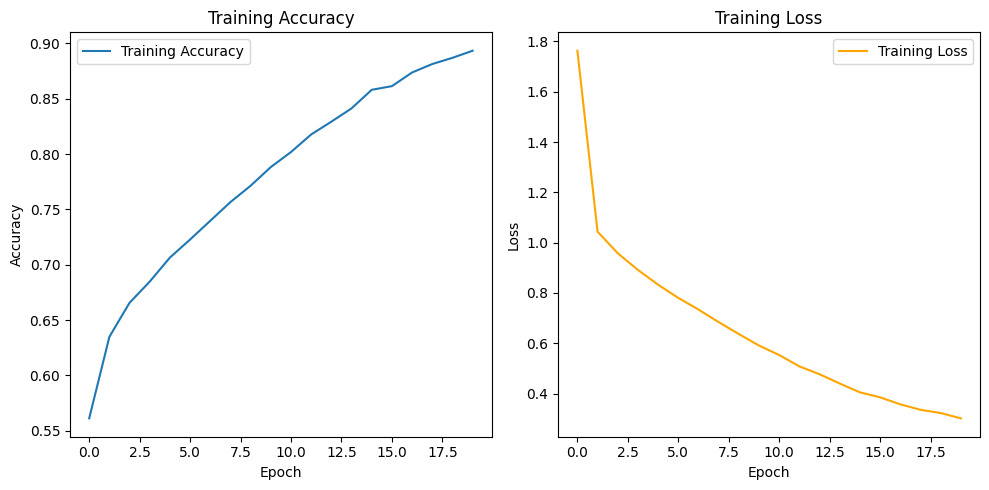

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, vgg16_model.parameters()), lr=0.0001)

# Training loop
epochs = 20
train_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    vgg16_model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = vgg16_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train
    average_loss = running_loss / len(train_loader)

    # Log training accuracy and loss
    print(f"Epoch {epoch + 1}/{epochs} - Training Accuracy: {train_accuracy}, Training Loss: {average_loss:.4f}")

    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(average_loss)

# Plot the results at the end
plt.figure(figsize=(10, 5))

# Plot training accuracy and loss
plt.subplot(1, 2, 1)
plt.plot(train_accuracy_list, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss_list, label='Training Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.tight_layout()
plt.show()

### 3.7 Evaluate your Model

Now that you have trained your model, do the followings:

* plot your model's confusion matrix on the test set.
* report its final accuracy on your test set.
* show some images from the test set with their corresponding true label and your predictions.

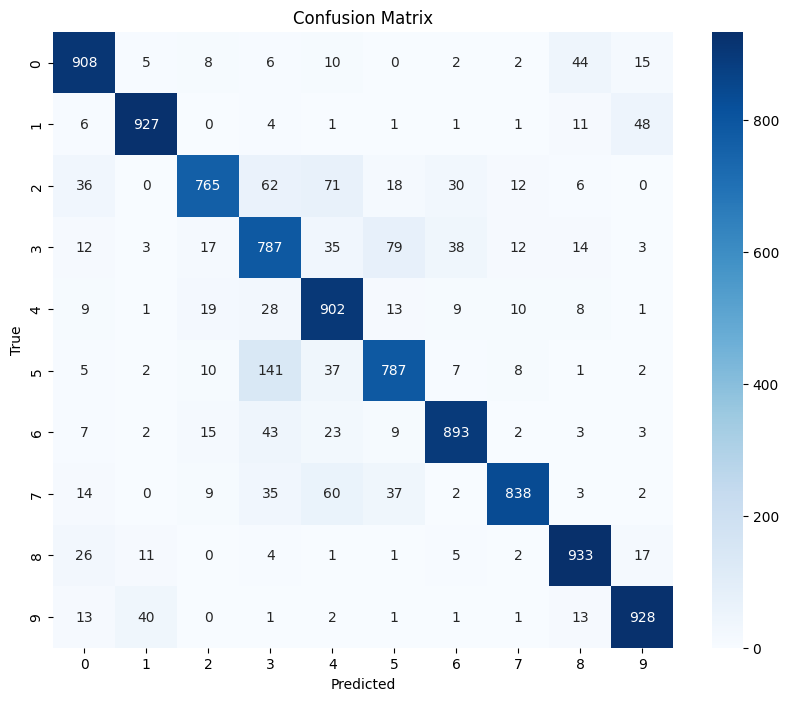

Final Accuracy on Test Set: 0.8668


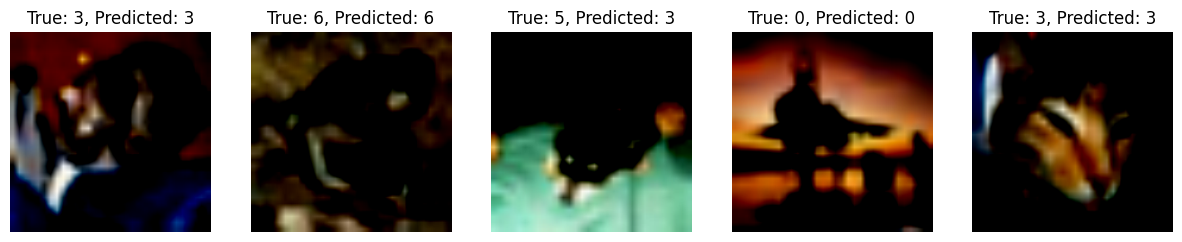

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Set the model to evaluation mode
vgg16_model.eval()

# Initialize variables for evaluation
all_labels = []
all_predictions = []

# Evaluate the model on the test set
with torch.no_grad():
    for inputs, labels in test_loader_vgg16:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vgg16_model(inputs)
        _, predicted = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate final accuracy on the test set
final_accuracy = np.sum(np.array(all_labels) == np.array(all_predictions)) / len(all_labels)
print(f"Final Accuracy on Test Set: {final_accuracy:.4f}")

# Show some images with predictions
num_images_to_show = 5
test_iterator = iter(test_loader_vgg16)

plt.figure(figsize=(15, 6))
for i in range(num_images_to_show):
    images, labels = next(test_iterator)
    images, labels = images.to(device), labels.to(device)

    outputs = vgg16_model(images)
    _, predicted = torch.max(outputs, 1)

    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(np.transpose(images[0].cpu().numpy(), (1, 2, 0)))
    plt.title(f'True: {labels[0]}, Predicted: {predicted[0]}')
    plt.axis('off')

plt.show()

### 3.8 Discussing and Comparison
- Discuss the advantages of transfer learning in terms of training time and accuracy scores.
- Also, cover potential drawbacks, like overfitting if the new dataset is too small or too different from the original dataset the model was trained on.

Transfer Learning obviously has the advantage of much less training time and better accuracy score, because of being pretrained on some similar data distribution.
Here we can see that the model transfered from vgg16 alsmost performed 10 percent better on accuracy.
But they have the disadvantage of overfitting, because of being very close to our data from the beginning and may get lower generalization score on some cases.